# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='sdck_monitoring'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
program,string,
parentproject,string,
project,string,
stationname,string,
stationcode,string,
sampledate,date,
collectiontime,time,
locationcode,string,
collectiondepth,integer,
unitcollectiondepth,string,


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,program,parentproject,project,stationname,stationcode,sampledate,collectiontime,locationcode,collectiondepth,unitcollectiondepth,...,regional_board,rb_number,huc8,huc8_number,huc10,huc10_number,huc12,huc12_number,waterbody_type,sampleid
0,SDCK Monitoring Program,San Diego Coastkeeper Ambient Monitoring Progran,SDCK Monthly monitoring,Box Canyon Dam (downstream at bank),BTQ-020,2009-01-12,2018-08-21 13:00:00,Not Recorded,30,cm,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SDCK Monitoring Program,San Diego Coastkeeper Ambient Monitoring Progran,SDCK Monthly monitoring,Cardiff Reef,SEL-010,2009-01-12,2018-08-21 11:00:00,Not Recorded,30,cm,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SDCK Monitoring Program,San Diego Coastkeeper Ambient Monitoring Progran,SDCK Monthly monitoring,Date St.,OTY-020,2009-01-12,2018-08-21 13:45:00,Not Recorded,30,cm,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SDCK Monitoring Program,San Diego Coastkeeper Ambient Monitoring Progran,SDCK Monthly monitoring,Date St.,OTY-020,2009-01-12,2018-08-21 13:45:00,Not Recorded,30,cm,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SDCK Monitoring Program,San Diego Coastkeeper Ambient Monitoring Progran,SDCK Monthly monitoring,El Camino del Norte Bridge,EDC-020,2009-01-12,2018-08-21 10:45:00,Not Recorded,30,cm,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,32
const,32
datetime,2
number,5
other,8


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0
program,SDCK Monitoring Program
parentproject,San Diego Coastkeeper Ambient Monitoring Progran
project,SDCK Monthly monitoring
locationcode,Not Recorded
collectiondepth,30
unitcollectiondepth,cm
sampletypecode,Grab
collectionreplicate,1
resultsreplicate,1
matrixname,samplewater


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

,0
labsampleid,NaN
observation,NaN
samplecomments,NaN
collectioncomments,NaN
resultscomments,NaN
batchcomments,NaN
groupsamples,NaN
expectedvalue,NaN
occupationmethod,NaN
startingbank,NaN


# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19544 entries, 0 to 19543
Data columns (total 2 columns):
sampledate        19544 non-null datetime64[ns]
collectiontime    19544 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 305.5 KB


None

,count,unique,top,freq,first,last
sampledate,19544,89,2015-05-16 00:00:00,312,2009-01-12 00:00:00,2016-06-25 00:00:00
collectiontime,19544,353,2018-08-21 10:00:00,604,2018-08-21 00:00:00,2018-08-21 23:35:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19544 entries, 0 to 19543
Data columns (total 5 columns):
result             19544 non-null float64
mdl                19544 non-null float64
rl                 19544 non-null float64
targetlatitude     19544 non-null float64
targetlongitude    19544 non-null float64
dtypes: float64(5)
memory usage: 763.5 KB


None

,count,mean,std,min,25%,50%,75%,max
result,19544.0,2259.534057,32346.077087,-0.060000,0.236000,10.000000,310.000000,2.419200e+06
mdl,19544.0,0.225594,0.383748,0.000000,0.000000,0.015000,0.230000,1.000000e+00
rl,19544.0,-18.413119,36.932169,-88.000000,0.015000,0.230000,2.000000,2.500000e+00
targetlatitude,19544.0,32.931318,0.199690,32.547642,32.764332,33.003639,33.071812,3.338245e+01
targetlongitude,19544.0,-117.172977,0.096748,-117.386497,-117.235558,-117.173607,-117.112640,-1.167932e+02


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


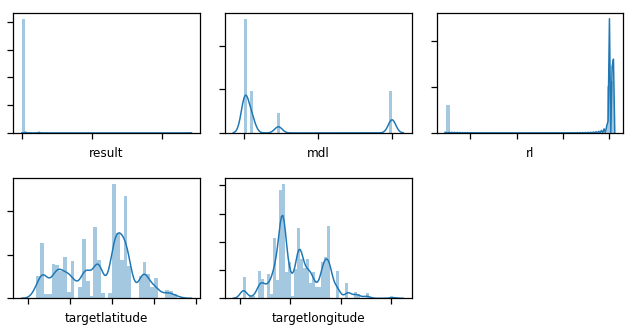

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

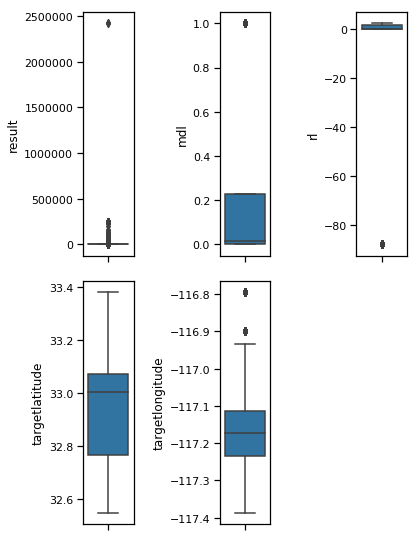

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

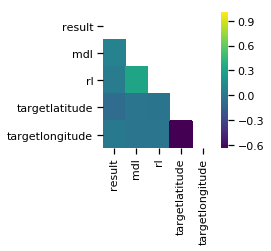

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19544 entries, 0 to 19543
Data columns (total 8 columns):
stationname             19544 non-null object
stationcode             19544 non-null object
labbatch                19544 non-null object
methodname              19544 non-null object
analyte                 19544 non-null object
unit                    19544 non-null object
resultqualcode          19544 non-null object
preppreservationname    19544 non-null object
dtypes: object(8)
memory usage: 1.2+ MB


None

,count,unique,top,freq
stationname,19544,60,Hwy I-5 overpass,780
stationcode,19544,60,LPQ-020,780
labbatch,19544,346,SDCK4/16/2011,227
methodname,19544,10,SM 9223,3895
analyte,19544,11,Temperature,2178
unit,19544,6,mg/L,6509
resultqualcode,19544,4,=,17189
preppreservationname,19544,2,None,13035


# Nulls


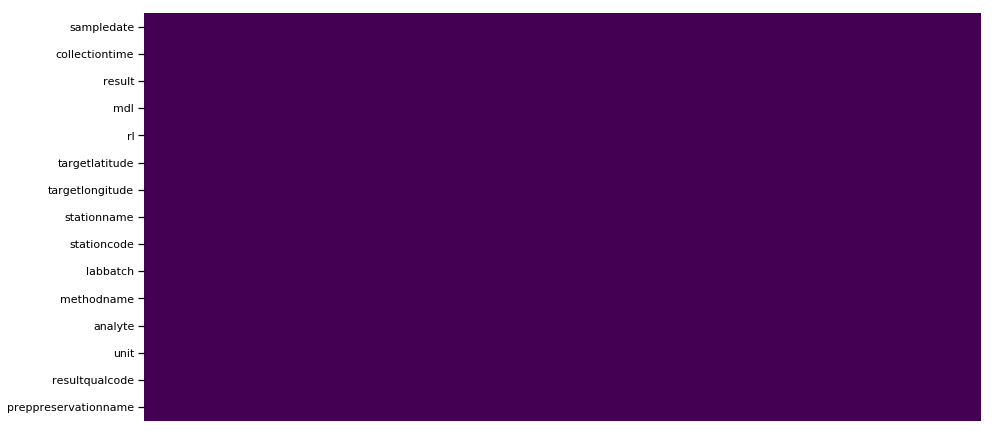

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )

In [24]:
_1.index.min(), _1.index.max()

(Timestamp('2009-01-12 00:00:00', freq='D'),
 Timestamp('2016-06-25 00:00:00', freq='D'))